# **Diabetes Prediction Model**
Hi guys! I'm Nikita Bhilare and here, I'll be determining the dataset which includes all the parameters required to predict the disease. I'll be exploring certain ML models for the same and figure out which yields better results and accuracy.

Importing all the dependencies.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

Analyzing the dataset

In [3]:
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
df=pd.read_csv('diabetes.csv')
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.isnull().values.any()

False

Histogram

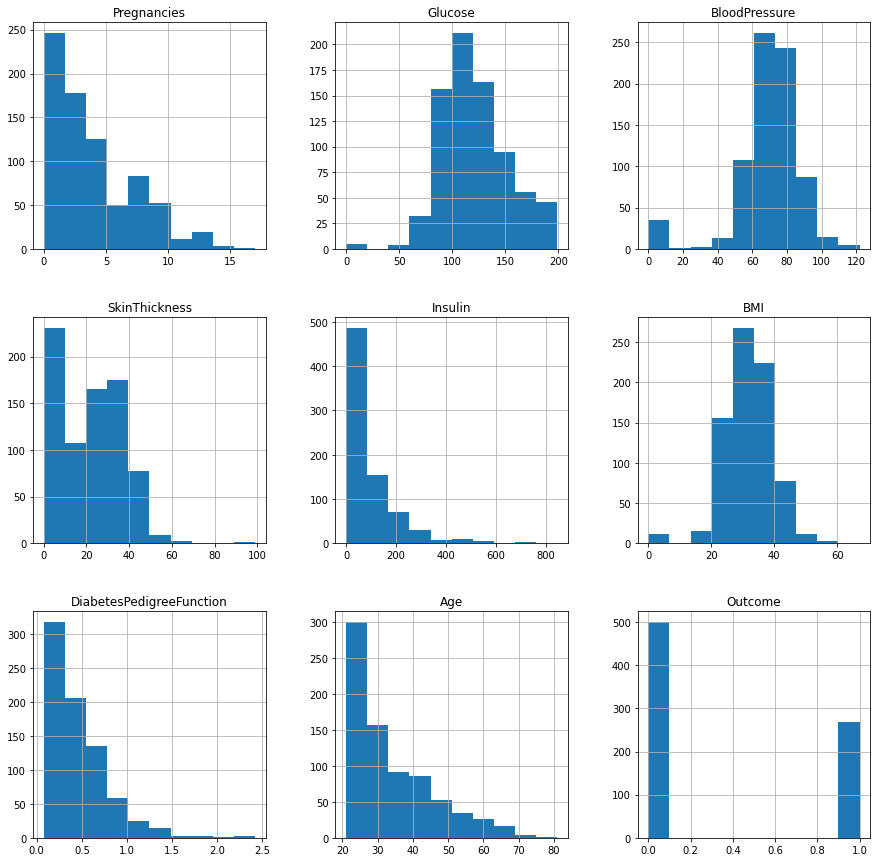

In [90]:
df.hist(bins=10,figsize=(15,15))
plt.show()

Heatmap Correlation

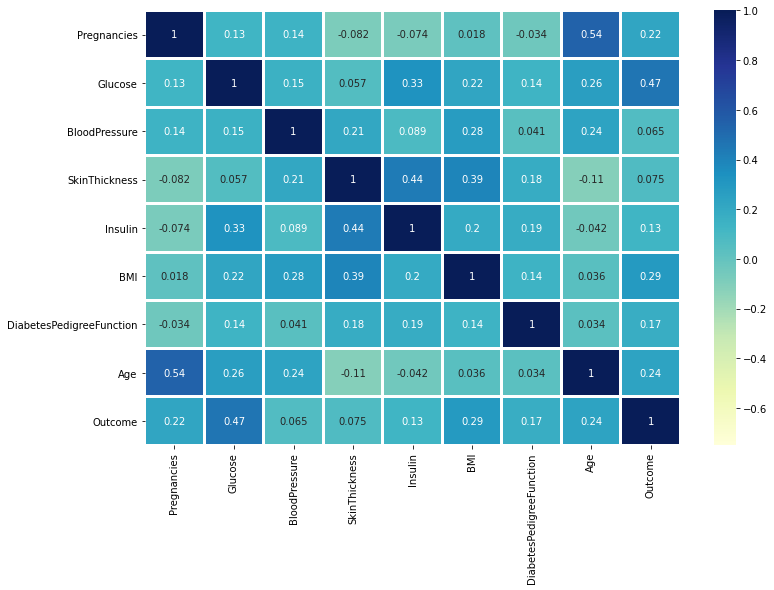

In [98]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="YlGnBu", linewidths=2, annot = True, vmin=-0.75)

Skin thickness,insulin,pregnencies and age are full independent of each other and age and pregencies has negative correlation.


0: non diabetic
1: diabetic.
Shows count value of each of the two values from the outcome column

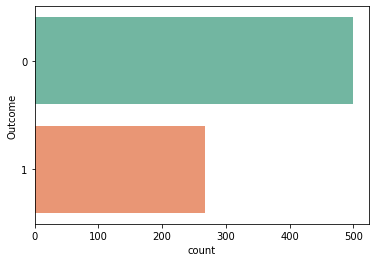

In [ ]:
sns.countplot(y=df['Outcome'],palette='Set2')

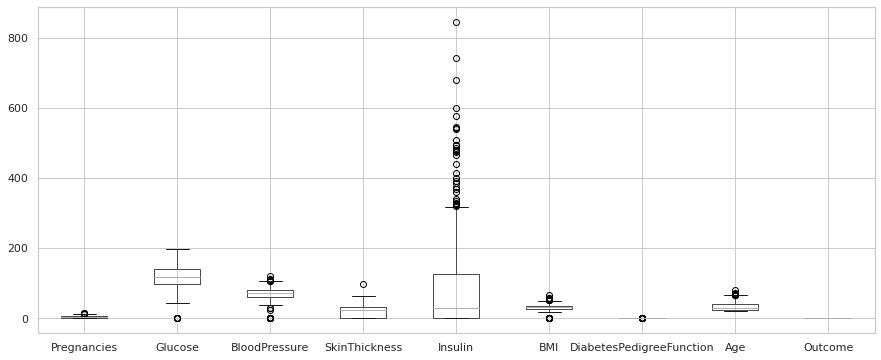

In [101]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

In [8]:
#outlier remove

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

---Q1--- 
 Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigr

In [9]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 80 records deleted

((768, 9), (639, 9))

In [10]:
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

**Train and test data = 80:20 is the ratio**

In [11]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((511, 8), (128, 8), (511,), (128,))

**Confusion Matrix**

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

#Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

acc=[]
roc=[]

clf=LogisticRegression()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

#find accuracy

ac=accuracy_score(test_y,y_pred)
acc.append(ac)
print("\nAccuracy {0}".format(ac))

#cross val score

result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy 0.796875
TP:  [ 4  8 11  7  6 10 10  9  9  7]
TN:  [34 34 33 31 30 33 31 30 28 33]
FN:  [12  8  5  9 10  6  6  7  7  9]
FP:  [2 1 2 4 5 2 4 5 7 2]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,Actual,Predicted
477,0,0
344,0,0
135,0,0
751,0,0
723,0,0


#Support Vector Machine

In [68]:
from sklearn.svm import SVC

clf=SVC(kernel='linear')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

#find accuracy

ac=accuracy_score(test_y,y_pred)
acc.append(ac)
print("\nAccuracy {0}".format(ac))

#cross val score

result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)


pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.8046875
TP:  [ 4  8 11  6  6 10 11  9 10  7]
TN:  [34 34 33 31 30 32 28 30 28 32]
FN:  [12  8  5 10 10  6  5  7  6  9]
FP:  [2 1 2 4 5 3 7 5 7 3]


,Actual,Predicted
477,0,0
344,0,0
135,0,0
751,0,0
723,0,0


#KNN



In [69]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

#find accuracy

ac=accuracy_score(test_y,y_pred)
acc.append(ac)
print("\nAccuracy {0}".format(ac))

#cross val score

result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.75
TP:  [ 5  7 10  9  7  9  8  9 10  9]
TN:  [34 29 33 26 26 28 23 28 23 29]
FN:  [11  9  6  7  9  7  8  7  6  7]
FP:  [ 2  6  2  9  9  7 12  7 12  6]


,Actual,Predicted
477,0,0
344,0,0
135,0,0
751,0,0
723,0,0


#Random forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

clf1=RandomForestClassifier()
clf1.fit(train_X,train_y)

y_pred=clf1.predict(test_X)

#find accuracy

ac=accuracy_score(test_y,y_pred)
acc.append(ac)

print("\nAccuracy {0}".format(ac))

#cross val score

result=cross_validate(clf1,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.796875
TP:  [ 5  7 11  8  9 10 11  7 10  8]
TN:  [34 34 31 28 30 30 28 33 25 30]
FN:  [11  9  5  8  7  6  5  9  6  8]
FP:  [ 2  1  4  7  5  5  7  2 10  5]


,Actual,Predicted
477,0,0
344,0,0
135,0,0
751,0,0
723,0,0


#Naive Bayes Theorem

In [71]:
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

#find accuracy

ac=accuracy_score(test_y,y_pred)
acc.append(ac)

print("\nAccuracy {0}".format(ac))

#cross val score

result=cross_validate(clf1,train_X,train_y,scoring=scoring,cv=10)
display_result(result)
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.8125
TP:  [ 5  8 10  7  8 11  9  8  9  9]
TN:  [34 34 31 28 30 29 27 33 28 32]
FN:  [11  8  6  9  8  5  7  8  7  7]
FP:  [2 1 4 7 5 6 8 2 7 3]


,Actual,Predicted
477,0,0
344,0,1
135,0,0
751,0,0
723,0,0


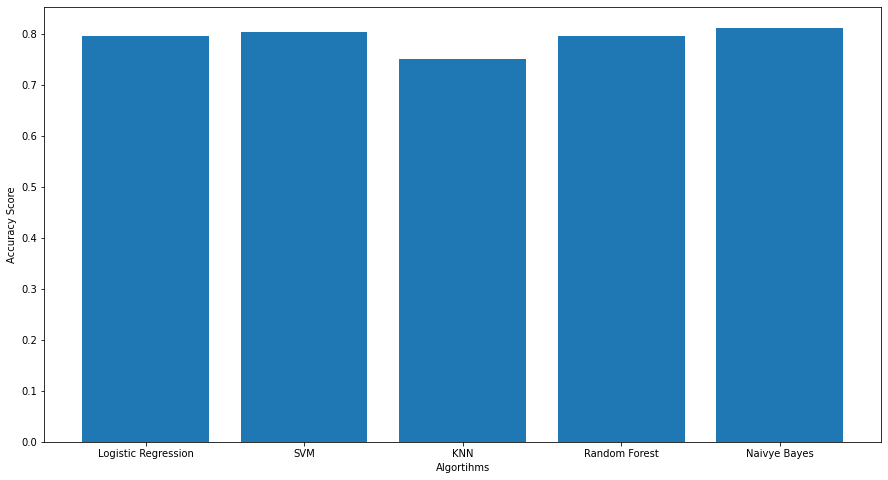

In [72]:
ax=plt.figure(figsize=(15,8))
plt.bar( ['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes'], acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()



**Naive Bayes algorithm proves to be the most accurate among all of the models mentioned with an accuracy of 81.25%** 

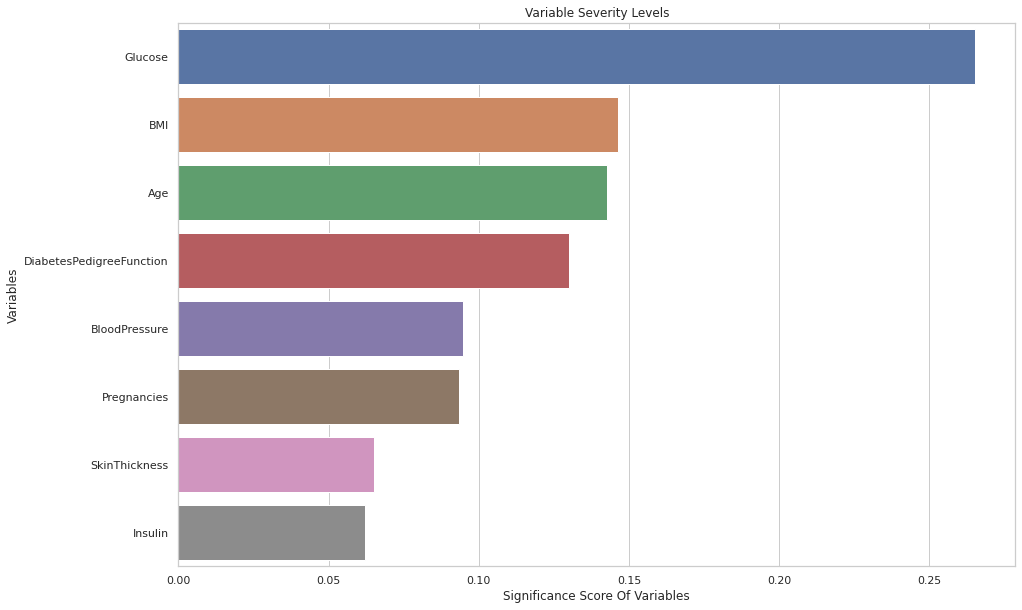

In [104]:
feature_imp = pd.Series(clf1.feature_importances_,
                        index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

In [79]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

dummyDB = pd.read_csv('diabetes.csv')
#Encode the quality col i.e change from object to int

dummyDB.iloc[:,8] = labelencoder.fit_transform( dummyDB.iloc[:,8].values) #8 bec outcome is at index 8

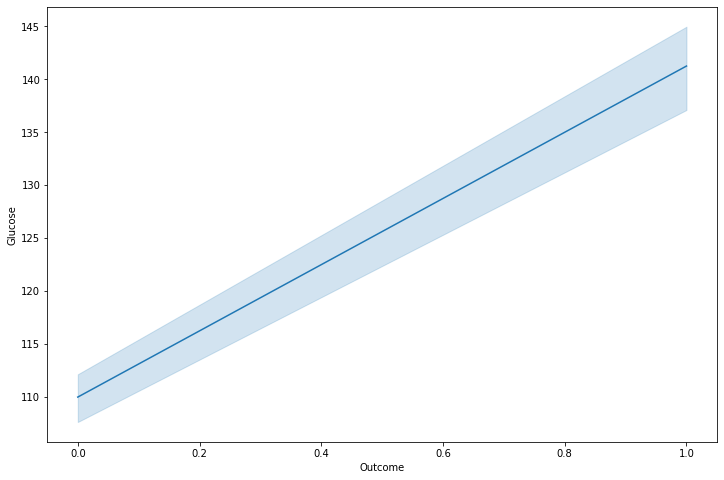

In [81]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['Outcome'], y=dummyDB['Glucose'])

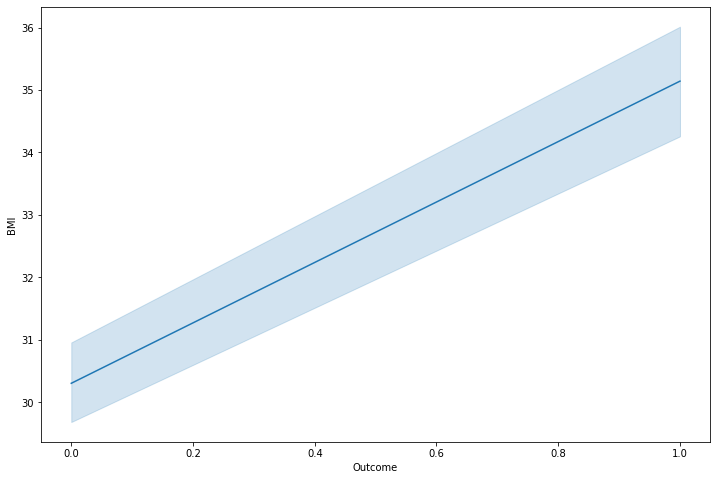

In [82]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['Outcome'], y=dummyDB['BMI'])

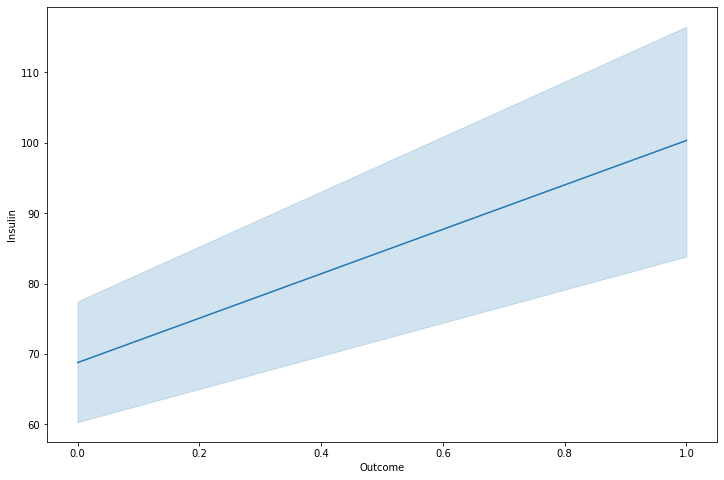

In [83]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['Outcome'], y=dummyDB['Insulin'])

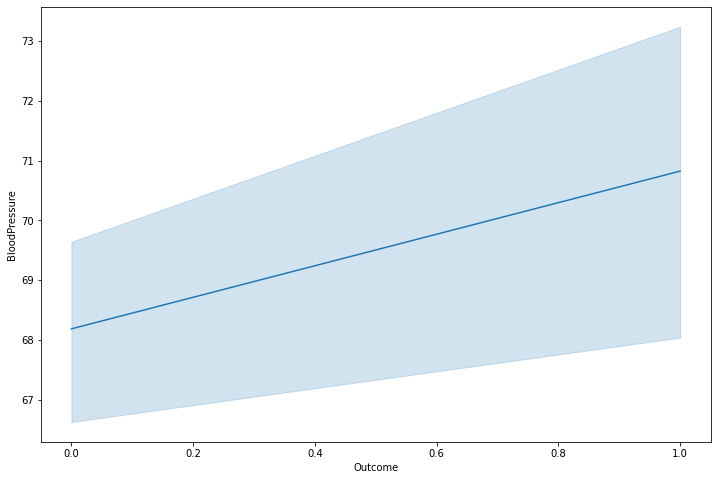

In [85]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['Outcome'], y=dummyDB['BloodPressure'])

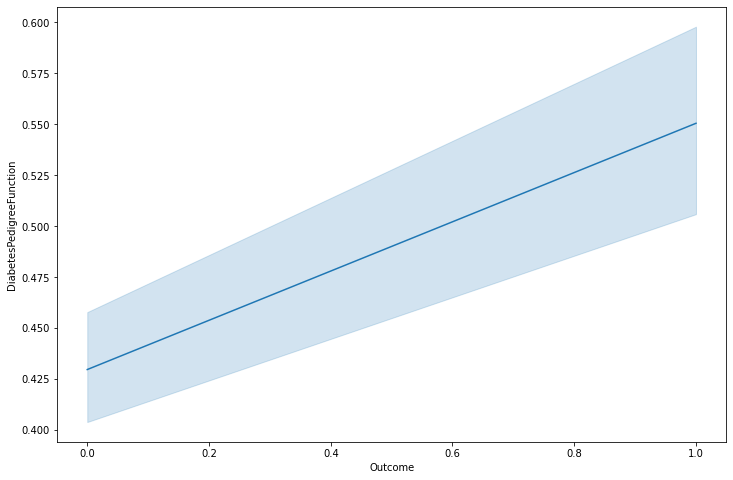

In [86]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['Outcome'], y=dummyDB['DiabetesPedigreeFunction'])

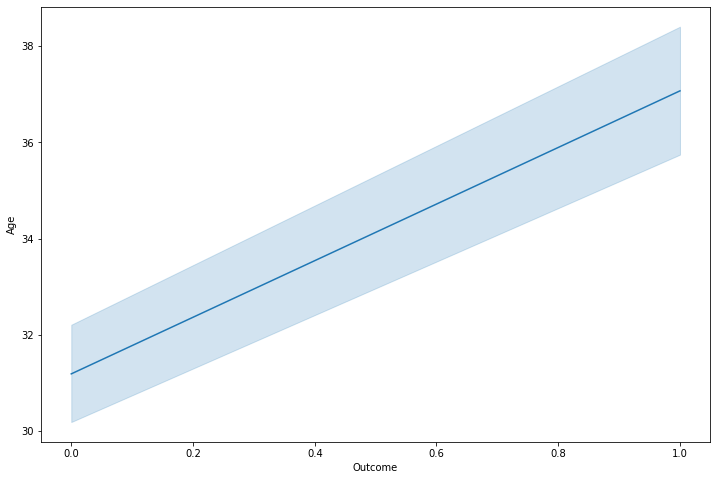

In [87]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['Outcome'], y=dummyDB['Age'])

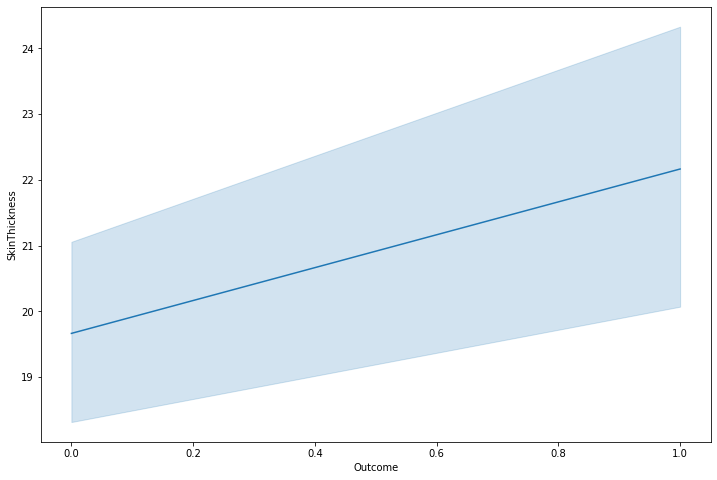

In [88]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['Outcome'], y=dummyDB['SkinThickness'])

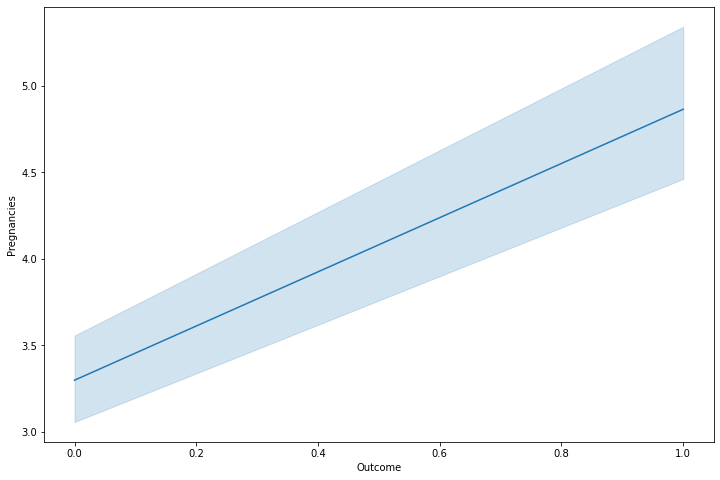

In [89]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['Outcome'], y=dummyDB['Pregnancies'])

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

from sklearn.preprocessing import StandardScaler
input_data = (11,	143,	94,	33,	146, 36.6, 0.254,	51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = clf1.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 2.20830007  0.81976181  1.92944276  0.81136698  1.00706428  0.71461458
  -0.69858189  1.65145033]]
[0]
The person is not diabetic
